#### IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### IMPORTING SALES DATASET

In [4]:
sales_df = pd.read_excel("./superstore_sales.xlsx")
sales_df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


#### DATA AUDIT

In [5]:
# df shape
sales_df.shape

(51290, 21)

In [6]:
# df colums
sales_df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [7]:
# dataset summary
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [8]:
#checking missing values
sales_df.isnull().sum()
#if nulll values were present
#sales_df[sales_df['col'].isnull()] ---displays  rows x cols Nan

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [9]:
#getting descriptive statistics summary
sales_df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


#### EXPLORATORY DATA ANALYSIS

1. <H7> WHAT IS THE OVERALL SALES TREND?

In [10]:
sales_df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [11]:
sales_df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [18]:
# Getting month and year from a dataset
sales_df['month_year'] = sales_df['order_date'].apply(lambda x: x.strftime('%Y - %m'))


In [25]:
# Getting month year trend
df_month_year_trend = sales_df.groupby('month_year').sum()['sales'].reset_index()
df_month_year_trend.head(2)


,month_year,sales
0,2011 - 01,98898.48886
1,2011 - 02,91152.15698


- <H10> PLOTTING SALES TREND

No handles with labels found to put in legend.


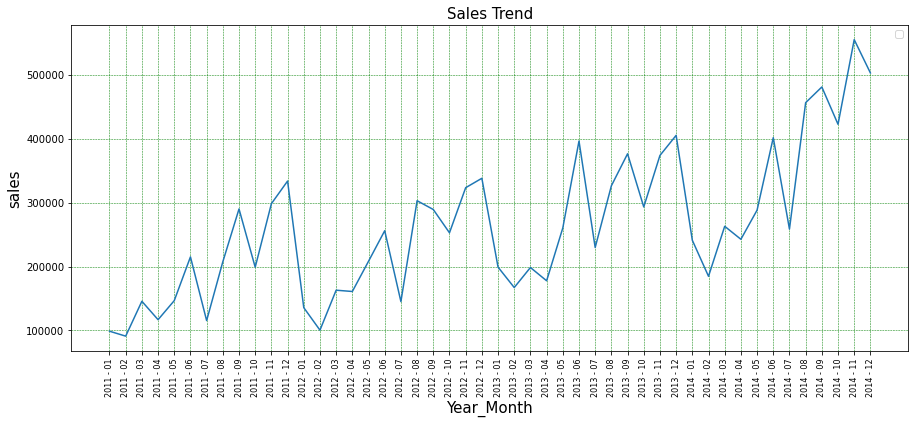

In [39]:
plt.figure(figsize=(15,6))

plt.plot(df_month_year_trend['month_year'],df_month_year_trend['sales'])
plt.title("Sales Trend", size = 15)
plt.ylabel('sales', size = 15)
plt.xlabel('Year_Month', size = 15)

plt.xticks(rotation= 'vertical', size = 8)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.legend()
plt.show()


2. <h7> WHAT ARE THE TOP 10 PRODUCTS BY SALES

In [41]:
sales_df.head(1)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium,2011,2011 - 01,2011 - 01


In [45]:
# Grouping product name column
product_sales_df = pd.DataFrame(sales_df.groupby('product_name').sum()['sales'])

In [47]:
# Sorting product sales
product_sales_df = product_sales_df.sort_values('sales', ascending= False)


In [48]:
# top to products
product_sales_df.head(10)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


3. <h7> WHICH ARE THE MOST SELLING PRODUCTS

In [49]:
sales_df.head(1)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium,2011,2011 - 01,2011 - 01


In [55]:
product_most_quantity_sold = pd.DataFrame(sales_df.groupby('product_name').sum()['quantity'])
product_most_quantity_sold.head(1)

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8


In [59]:
# Sorting
product_most_quantity_sold = product_most_quantity_sold.sort_values('quantity', ascending= False)
product_most_quantity_sold[:10]


,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


4. <h7> WHAT IS THE MOST PREFERRED SHIP MODE

In [60]:
sales_df.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011 - 01,2011 - 01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011 - 01,2011 - 01


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


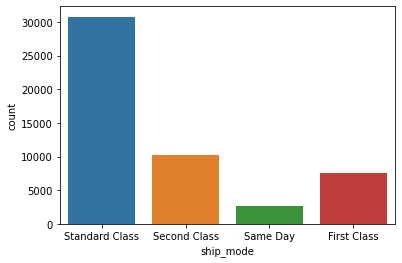

In [64]:
plt.Figure(figsize=(10,9))

sns.countplot(sales_df['ship_mode'])
plt.show()


5. <h7> WHICH ARE THE MOST PROFITABLE CATEGORY & SUB-CATEGORY

In [67]:
sales_df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month', 'month_year'],
      dtype='object')

In [70]:
sales_df[['category','sub_category']]

,category,sub_category
0,Office Supplies,Storage
1,Office Supplies,Supplies
2,Office Supplies,Storage
3,Office Supplies,Paper
4,Furniture,Furnishings
...,...,...
51285,Office Supplies,Binders
51286,Office Supplies,Binders
51287,Office Supplies,Labels
51288,Office Supplies,Labels


In [75]:
# Groupin the category and sub-category
cat_subcat_profit = pd.DataFrame(sales_df.groupby(['category','sub_category']).sum()['profit'])
cat_subcat_profit

profit
category        sub_category              
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870
Office Supplies Appliances    141680.58940
                Art            57953.91090
                Binders        72449.84600
                Envelopes      29601.11630
                Fasteners      11525.42410
                Labels         15010.51200
                Paper          59207.68270
                Storage       108461.48980
                Supplies       22583.26310
Technology      Accessories   129626.30620
                Copiers       258567.54818
                Machines       58867.87300
                Phones        216717.00580

In [77]:
#sorting
cat_subcat_profit.sort_values(['category','profit'], ascending= False)



profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870